In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# Chargement des données
data = pd.read_csv('air-quality-india.csv')

In [28]:
# Suppression des valeurs manquantes (si nécessaire)
data = data.dropna()

In [29]:
# Sélection des caractéristiques (features) et de la cible (target)
X = data[['Year', 'Month', 'Day', 'Hour']]  # Vous pouvez ajouter d'autres caractéristiques si nécessaire
y = data['PM2.5']

In [30]:
# Encodage des variables catégorielles si nécessaire (par exemple pour 'Year', 'Month', 'Day', 'Hour')
# X = pd.get_dummies(X, drop_first=True)  # Si nécessaire, pour encoder des variables catégorielles

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
# Validation croisée (k-fold cross-validation)
cross_val_score(LinearRegression(), X_scaled, y, cv=5, scoring='neg_mean_squared_error')

array([-844.76770156, -663.20584859, -530.74758243, -550.00915355,
       -495.69369284])

In [ ]:
# Division des données en ensemble d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modèle de régression linéaire simple
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Prédictions
y_pred = lin_reg.predict(X_test)

# Évaluation de la performance avec MSE et précision
mse = mean_squared_error(y_test, y_pred)
print(f"MSE de la régression linéaire simple : {mse}")

MSE de la régression linéaire simple : 584.7634602938119


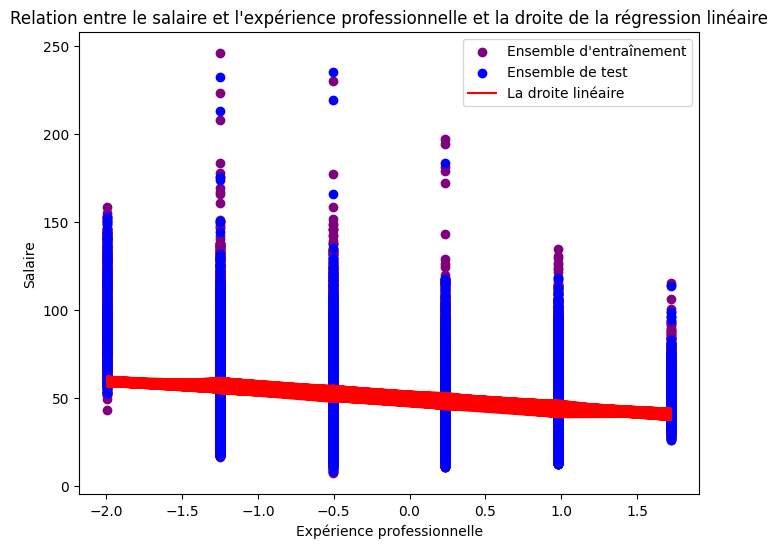

In [38]:
import matplotlib.pyplot as plt

# Visualisation des données d'entraînement et de test avec la droite de régression
plt.figure(figsize=(8, 6))

# Affichage des données d'entraînement
plt.scatter(X_train[:, 0], y_train, color='purple', label="Ensemble d'entraînement")  # Utilisez X_train[:, 0] si X_train est multidimensionnel

# Affichage des données de test
plt.scatter(X_test[:, 0], y_test, color='blue', label="Ensemble de test")  # Utilisez X_test[:, 0] si X_test est multidimensionnel

# Affichage de la droite de régression
plt.plot(X_test[:, 0], y_pred, color='red', label='La droite linéaire')  # Utilisez X_test[:, 0] pour une dimension

# Titre et labels
plt.title("Relation entre le salaire et l'expérience professionnelle et la droite de la régression linéaire")
plt.xlabel("Expérience professionnelle")
plt.ylabel('Salaire')

# Légende
plt.legend()

# Affichage du graphique
plt.show()


MSE de la régression polynomiale de degré 1 : 584.7634602938119


ValueError: X has 1 features, but PolynomialFeatures is expecting 4 features as input.

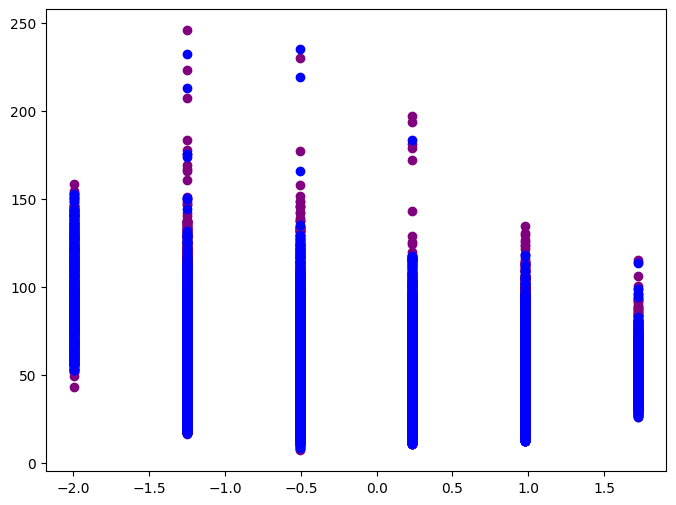

In [41]:
# Test de la régression polynomiale avec différents degrés de polynômes
for degree in range(1, 6):  # Tester des degrés de 1 à 5
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X_train)
    
    # Modèle de régression linéaire sur les données polynomiales
    poly_reg = LinearRegression()
    poly_reg.fit(X_poly, y_train)
    
    # Prédictions sur l'ensemble de test
    X_poly_test = poly_features.transform(X_test)
    y_poly_pred = poly_reg.predict(X_poly_test)
    
    # Évaluation de la performance avec MSE et précision
    mse_poly = mean_squared_error(y_test, y_poly_pred)
    print(f"MSE de la régression polynomiale de degré {degree} : {mse_poly}")

    # Visualisation des données d'entraînement, de test et de la courbe polynomiale
    plt.figure(figsize=(8, 6))

    # Affichage des données d'entraînement
    plt.scatter(X_train[:, 0], y_train, color='purple', label="Ensemble d'entraînement")

    # Affichage des données de test
    plt.scatter(X_test[:, 0], y_test, color='blue', label="Ensemble de test")

    # Affichage de la courbe polynomiale
    X_grid = np.linspace(min(X_train[:, 0]), max(X_train[:, 0]), 100).reshape(-1, 1)  # Générer un intervalle pour tracer la courbe
    X_grid_poly = poly_features.transform(X_grid)
    y_grid_pred = poly_reg.predict(X_grid_poly)
    plt.plot(X_grid, y_grid_pred, color='red', label=f'Courbe polynomiale - Degré {degree}')

    # Titre et labels
    plt.title(f"Relation entre le salaire et l'expérience professionnelle et la courbe de la régression polynomiale (degré {degree})")
    plt.xlabel("Expérience professionnelle")
    plt.ylabel('Salaire')

    # Légende
    plt.legend()

    # Affichage du graphique
    plt.show()